In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
from math import * 

os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
if path_parent.endswith("Abaqus-Macromechanics-Project"):
    os.chdir(path_parent) 
    print("Moving up to the parent directory")
    print(os.getcwd())

from modules.helper import *

The current directory is: 
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project\notebooks
Moving up to the parent directory
c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project


In [9]:
params = np.load("MOO_results\DP1000_25C_SwiftVoce_curve1\parameters.npy", allow_pickle=True)
params025 = params[0:25]
params2550 = params[25:50]
params5075 = params[50:75]
params75100 = params[75:100]
params100125 = params[100:125]
params125150 = params[125:150]
params150175 = params[150:175]
params175200 = params[175:200]

np.save("MOO_results\DP1000_25C_SwiftVoce_curve1\parameters025.npy", params025)
np.save("MOO_results\DP1000_25C_SwiftVoce_curve1\parameters2550.npy", params2550)
np.save("MOO_results\DP1000_25C_SwiftVoce_curve1\parameters5075.npy", params5075)
np.save("MOO_results\DP1000_25C_SwiftVoce_curve1\parameters75100.npy", params75100)
np.save("MOO_results\DP1000_25C_SwiftVoce_curve1\parameters100125.npy", params100125)
np.save("MOO_results\DP1000_25C_SwiftVoce_curve1\parameters125150.npy", params125150)
np.save("MOO_results\DP1000_25C_SwiftVoce_curve1\parameters150175.npy", params150175)
np.save("MOO_results\DP1000_25C_SwiftVoce_curve1\parameters175200.npy", params175200)

print(params)

[{'c1': 0.7065706570657065, 'c2': 252.6252625262526, 'c3': 0.06090609060906091, 'c4': 0.45364536453645365, 'c5': 1216.5216521652164, 'c6': 28.9028902890289, 'c7': 435.9435943594359}
 {'c1': 0.954995499549955, 'c2': 957.0957095709571, 'c3': 0.09365936593659366, 'c4': 0.7565756575657566, 'c5': 1080.3080308030803, 'c6': 275.7275727572757, 'c7': 440.34403440344033}
 {'c1': 0.6898689868986899, 'c2': 1390.1390139013902, 'c3': 0.0902990299029903, 'c4': 0.6917691769176918, 'c5': 19.6019601960196, 'c6': 395.6395639563956, 'c7': 485.6485648564856}
 {'c1': 0.12271227122712272, 'c2': 1285.128512851285, 'c3': 0.08448844884488449, 'c4': 0.9007900790079009, 'c5': 1506.7506750675066, 'c6': 743.9743974397439, 'c7': 11.3011301130113}
 {'c1': 0.5997599759975998, 'c2': 1937.5937593759375, 'c3': 0.041084108410841085, 'c4': 0.9157915791579159, 'c5': 896.4896489648964, 'c6': 810.08100810081, 'c7': 709.070907090709}
 {'c1': 0.36293629362936297, 'c2': 1361.9361936193618, 'c3': 0.08143814381438144, 'c4': 0.5663

In [2]:
# Add column force,N to the target curve
# Create new dataframe

targetPathCurve1 = "MOO_targets/DP1000_400C_SwiftVoce_curve1/NDBR50/FD_Curve.csv"
targetPathCurve2 = "MOO_targets/DP1000_400C_SwiftVoce_curve1/NDBR6/FD_Curve.csv"
targetPathCurve3 = "MOO_targets/DP1000_400C_SwiftVoce_curve1/CHD6/FD_Curve.csv"

# df = pd.DataFrame(columns=['displacement/mm', 'force/kN', 'force/N'])
# targetCurve = pd.read_csv(f"{targetPathCurve1}")
# df['displacement/mm'] = targetCurve['displacement/mm']
# df['force/kN'] = targetCurve['force/kN']
# df['force/N'] = targetCurve['force/kN'] * 1e3
# df.to_csv(f"{targetPathCurve1}",index=False)

# df = pd.DataFrame(columns=['displacement/mm', 'force/kN', 'force/N'])
# targetCurve = pd.read_csv(f"{targetPathCurve2}")
# df['displacement/mm'] = targetCurve['displacement/mm']
# df['force/kN'] = targetCurve['force/kN'] 
# df['force/N'] = targetCurve['force/kN'] * 1e3
# df.to_csv(f"{targetPathCurve2}",index=False)

# df = pd.DataFrame(columns=['displacement/mm', 'force/kN', 'force/N'])
# targetCurve = pd.read_csv(f"{targetPathCurve3}")
# df['displacement/mm'] = targetCurve['displacement/mm']
# df['force/kN'] = targetCurve['force/kN'] 
# df['force/N'] = targetCurve['force/kN'] * 1e3
# df.to_csv(f"{targetPathCurve3}",index=False)

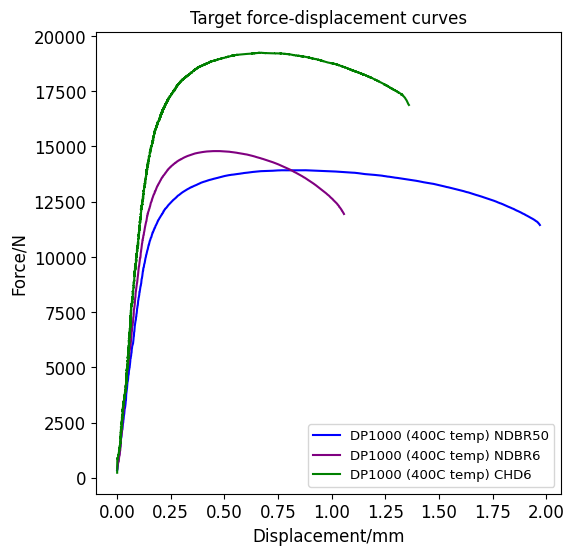

In [3]:
# Plot all target curves
colors = ["blue", "purple", "green"]
startingIndex = 20
r2_threshold = 0.835
targetCurve1 = pd.read_csv(targetPathCurve1)
yieldPoint1 = calculate_yielding_index(targetCurve1['displacement/mm'], targetCurve1['force/N'], r2_threshold=r2_threshold)
targetCurve2 = pd.read_csv(targetPathCurve2)
yieldPoint2 = calculate_yielding_index(targetCurve2['displacement/mm'], targetCurve2['force/N'], r2_threshold=r2_threshold)
targetCurve3 = pd.read_csv(targetPathCurve3)
yieldPoint3 = calculate_yielding_index(targetCurve3['displacement/mm'], targetCurve3['force/N'], r2_threshold=r2_threshold)

fontsize=12
# Plot all target curves
plt.figure(figsize=(6,6))
# line type is -- 
plt.plot(targetCurve1['displacement/mm'], targetCurve1['force/N'], color="blue",label='DP1000 (400C temp) NDBR50')
# vertical red line
#plt.axvline(x=targetCurve1['displacement/mm'][yieldPoint1], color='blue', linestyle='--', label='Yielding point')
plt.plot(targetCurve2['displacement/mm'], targetCurve2['force/N'], color="purple", label='DP1000 (400C temp) NDBR6')
#plt.axvline(x=targetCurve2['displacement/mm'][yieldPoint2], color="purple", linestyle='--')
plt.plot(targetCurve3['displacement/mm'], targetCurve3['force/N'], color="green", label='DP1000 (400C temp) CHD6')
#plt.axvline(x=targetCurve3['displacement/mm'][yieldPoint3], color='green', linestyle='--')
plt.title('Target force-displacement curves', fontsize=fontsize)
plt.xlabel('Displacement/mm',fontsize=fontsize)
plt.ylabel('Force/N', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize-2.5)

Text(0, 0.5, 'Force/N')

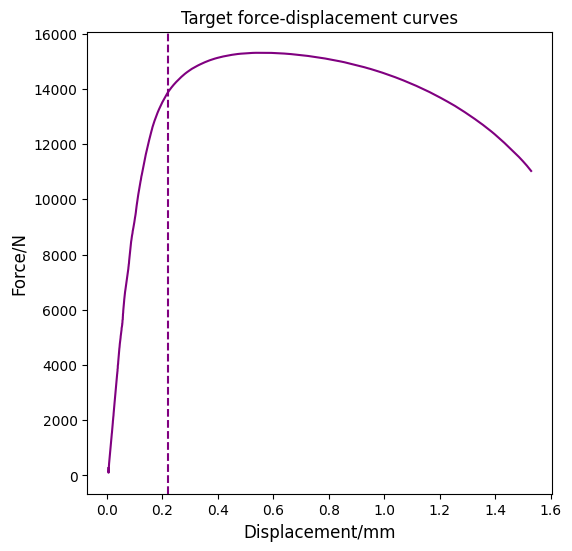

In [4]:
# Plot all target curves for 25C. Geometries are NDBR50, NDBR20, NDBR6, CHD6, SH 

targetPathCurve1 = "MOO_targets/DP1000_25C_SwiftVoce_curve1/NDBR50/FD_Curve.csv"
targetPathCurve2 = "MOO_targets/DP1000_25C_SwiftVoce_curve1/NDBR20/FD_Curve.csv"
targetPathCurve3 = "MOO_targets/DP1000_25C_SwiftVoce_curve1/NDBR6/FD_Curve.csv"
targetPathCurve4 = "MOO_targets/DP1000_25C_SwiftVoce_curve1/CHD6/FD_Curve.csv"
targetPathCurve5 = "MOO_targets/DP1000_25C_SwiftVoce_curve1/SH/FD_Curve.csv"

targetCurve1 = pd.read_csv(targetPathCurve1)
yieldPoint1 = calculate_yielding_index(targetCurve1['displacement/mm'], targetCurve1['force/N'], r2_threshold=r2_threshold)
targetCurve2 = pd.read_csv(targetPathCurve2)
yieldPoint2 = calculate_yielding_index(targetCurve2['displacement/mm'], targetCurve2['force/N'], r2_threshold=r2_threshold)
targetCurve3 = pd.read_csv(targetPathCurve3)
yieldPoint3 = calculate_yielding_index(targetCurve3['displacement/mm'], targetCurve3['force/N'], r2_threshold=r2_threshold)
targetCurve4 = pd.read_csv(targetPathCurve4)
yieldPoint4 = calculate_yielding_index(targetCurve4['displacement/mm'], targetCurve4['force/N'], r2_threshold=r2_threshold)
targetCurve5 = pd.read_csv(targetPathCurve5)
yieldPoint5 = calculate_yielding_index(targetCurve5['displacement/mm'], targetCurve5['force/N'], r2_threshold=r2_threshold)

fontsize=12
# Plot all target curves
plt.figure(figsize=(6,6))
# line type is --
#plt.plot(targetCurve1['displacement/mm'], targetCurve1['force/N'], color="blue",label='DP1000 (25C temp) NDBR50')
# vertical red line
#plt.axvline(x=targetCurve1['displacement/mm'][yieldPoint1], color='blue', linestyle='--', label='Yielding point')
plt.plot(targetCurve2['displacement/mm'], targetCurve2['force/N'], color="purple", label='DP1000 (25C temp) NDBR20')
plt.axvline(x=targetCurve2['displacement/mm'][800], color="purple", linestyle='--')
#plt.plot(targetCurve3['displacement/mm'], targetCurve3['force/N'], color="green", label='DP1000 (25C temp) NDBR6')
#plt.axvline(x=targetCurve3['displacement/mm'][yieldPoint3], color='green', linestyle='--')
#plt.plot(targetCurve4['displacement/mm'], targetCurve4['force/N'], color="red", label='DP1000 (25C temp) CHD6')
#plt.axvline(x=targetCurve4['displacement/mm'][200], color='red', linestyle='--')
#plt.plot(targetCurve5['displacement/mm'], targetCurve5['force/N'], color="orange", label='DP1000 (25C temp) SH')
#plt.axvline(x=targetCurve4['displacement/mm'][830], color='orange', linestyle='--')
plt.title('Target force-displacement curves', fontsize=fontsize)
plt.xlabel('Displacement/mm',fontsize=fontsize)
plt.ylabel('Force/N', fontsize=fontsize)